In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('fivethirtyeight')

import datetime

In [140]:
"""
-supervised regression problem
-this is regression b/c target is continuous as opposed to discrete classes in classification

ML workflow:
1. State the question and determine required data
2  Acquire the data in an accessible format
3. Identify and correct missing data points/anomalies as required
4. Prepare the data for the machine learning model
5. Establish a baseline model that you aim to exceed
6. Train the model on the training data
7. Make predictions on the test data
8. Compare predictions to the known test set targets and calculate performance metrics
9. If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
10.Interpret model and report results visually and numerically

1. Predict the max temperature tomorrow for our city.
"""

data_df = pd.read_csv('data/temps.csv')

In [141]:
"""
temp_2 - max temperature 2 days prior
temp_1 - max temperature 1 day prior
average - historical average max temperature
actual - max temperature measurement
friend - your firend's prediction, a random number between 20 below thee average and 20 above the average.

The target is 'actual'
"""

data_df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [142]:
print('The shape of features: ', data_df.shape)

The shape of features:  (348, 9)


In [143]:
data_df.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [144]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
year       348 non-null int64
month      348 non-null int64
day        348 non-null int64
week       348 non-null object
temp_2     348 non-null int64
temp_1     348 non-null int64
average    348 non-null float64
actual     348 non-null int64
friend     348 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 24.5+ KB


/Users/davidtorres/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/davidtorres/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/davidtorres/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/davidtorres/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, d

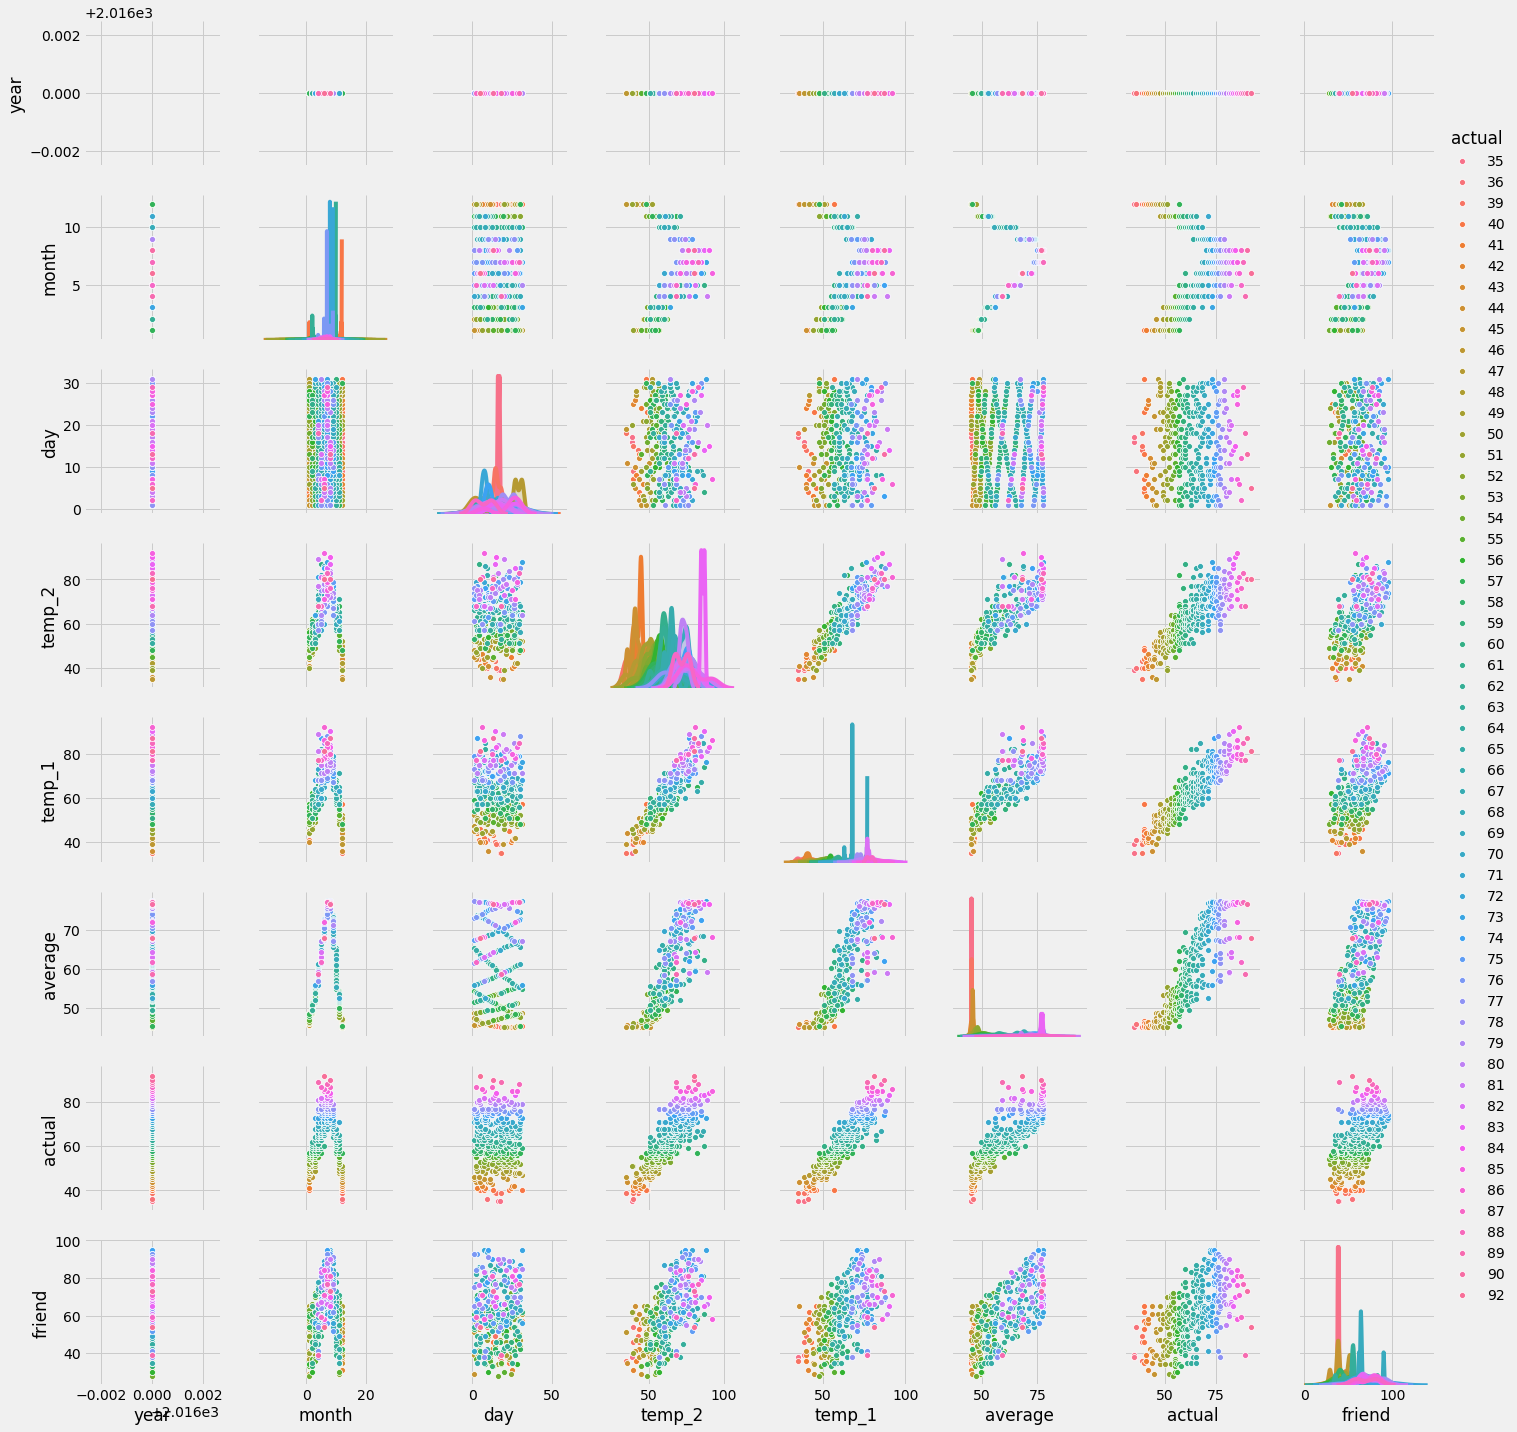

In [145]:
sns.pairplot(data_df, hue='actual');

In [146]:
years = data_df['year']
months = data_df['month']
days = data_df['day']

dates = [str(year) + '-' + str(month) + '-' + str(day) for year, month,day in zip(years,months,days)]
dates = pd.Series(dates)

In [147]:
train = pd.concat([data_df, dates], axis=1)

In [148]:

train = train.rename(columns = {0:'dates_merge'})

In [149]:
train.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend,dates_merge
0,2016,1,1,Fri,45,45,45.6,45,29,2016-1-1
1,2016,1,2,Sat,44,45,45.7,44,61,2016-1-2
2,2016,1,3,Sun,45,44,45.8,41,56,2016-1-3
3,2016,1,4,Mon,44,41,45.9,40,53,2016-1-4
4,2016,1,5,Tues,41,40,46.0,44,41,2016-1-5


In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 10 columns):
year           348 non-null int64
month          348 non-null int64
day            348 non-null int64
week           348 non-null object
temp_2         348 non-null int64
temp_1         348 non-null int64
average        348 non-null float64
actual         348 non-null int64
friend         348 non-null int64
dates_merge    348 non-null object
dtypes: float64(1), int64(7), object(2)
memory usage: 27.3+ KB


In [151]:
train["dates_merge"] = pd.to_datetime(train["dates_merge"])

In [152]:
train.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend,dates_merge
0,2016,1,1,Fri,45,45,45.6,45,29,2016-01-01
1,2016,1,2,Sat,44,45,45.7,44,61,2016-01-02
2,2016,1,3,Sun,45,44,45.8,41,56,2016-01-03
3,2016,1,4,Mon,44,41,45.9,40,53,2016-01-04
4,2016,1,5,Tues,41,40,46.0,44,41,2016-01-05


In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 10 columns):
year           348 non-null int64
month          348 non-null int64
day            348 non-null int64
week           348 non-null object
temp_2         348 non-null int64
temp_1         348 non-null int64
average        348 non-null float64
actual         348 non-null int64
friend         348 non-null int64
dates_merge    348 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 27.3+ KB


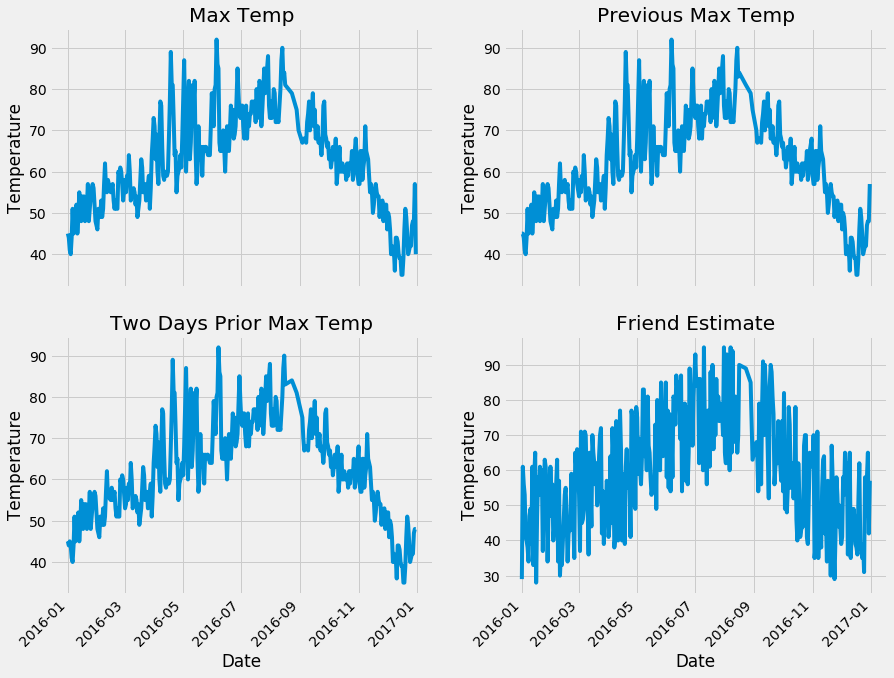

In [154]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (13,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(train['dates_merge'], train['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(train['dates_merge'], train['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# Temperature from 2 days ago
ax3.plot(train['dates_merge'], train['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(train['dates_merge'], train['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

One-Hot Encoding

In [155]:
#one hot encode categorical features
# week
train_1 = train.copy()
train_1 = pd.get_dummies(train_1, drop_first=True)

In [156]:
train_1.head()

,year,month,day,temp_2,temp_1,average,actual,friend,dates_merge,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,2016-01-01,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,2016-01-02,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,2016-01-03,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,2016-01-04,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,2016-01-05,0,0,0,0,1,0


In [157]:
print('Shape of features before encoding: ', data_df.shape)
print('Shape of features after encoding: ', train_1.shape)

Shape of features before encoding:  (348, 9)
Shape of features after encoding:  (348, 15)


Features and Labels

In [197]:
X = train_1.drop(['actual','dates_merge'],axis=1)
y = np.array(train_1['actual'])
feature_list = list(train_1.columns)

#features = np.array(train_1)

Train/Test Split

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [199]:
"""
training features columns will match testing feature number of columns

"""

print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
print(y_test.shape)

(261, 13)
(87,)
(87, 13)
(87,)


Establish Baseline

Before evaluating predictions, need to establish a baseline, a sensible measure that we hope to beat with model. <br>The baseline prediction can be the historical max temperature averages.<br>Our baseline is the error we would get if we predicted the average max termperature for all days.

In [200]:
feature_list.index('average')

5

In [201]:
#the baseline predictions are historical averages.
#if we can't be average error of 5 degrees we need to rethink approach.
baseline_preds = X_test.iloc[:,feature_list.index('average')]

baseline_errors = abs(baseline_preds - y_test)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


#### Train Model

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
#instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Make Predictions on Test Set

In [208]:
"""
average estiamte is offf by 3.74 degress. That is more than 1 degree average improvement over baseline.

"""

predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.74 degrees.


In [211]:
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_test,predictions))

MAE:  3.73903448275862


In [217]:
# Calculate and display accuracy
accuracy = 100 - round(np.mean(errors))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.0 %.


In [220]:
"""
Model has learned how to predict the maximum accuracy temperature for the next day in Seattle with 96% accuracy.
"""
print('MAE: ', 100 - mean_absolute_error(y_test,predictions))

MAE:  96.26096551724137


#### Variable Importance

In [221]:
"""
-top of the list is temp_1, the max temperatures of day before.
-second, average - which is historical average max temperature

"""
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.7
Variable: average              Importance: 0.19
Variable: day                  Importance: 0.03
Variable: actual               Importance: 0.03
Variable: temp_2               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: friend               Importance: 0.0
Variable: dates_merge          Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0


In [228]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = X_train.iloc[:, important_indices]
test_important = X_test.iloc[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
#Mean Absolute Error: 3.9 degrees.
#Accuracy: 93.8 %.

Mean Absolute Error: 3.9 degrees.
Accuracy: 93.8 %.


#### Bar Plot Feature Importances

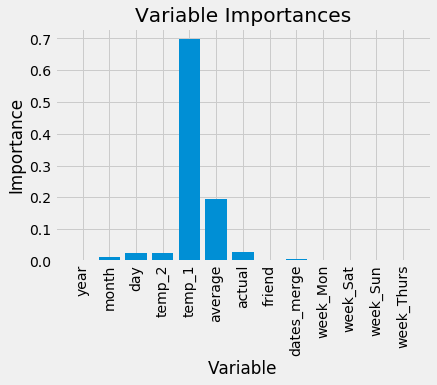

In [229]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

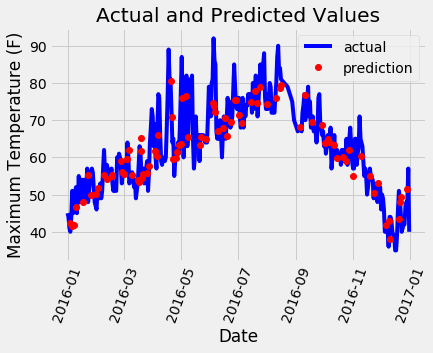

In [234]:
"""
plot entire dataset with predictions highlighted
-use plot to determine if there are any outliers in either data or predictions. 
-doesn't look like we have any noticeable outliers that need to be corrected.

"""
# Dates of training values
months = data_df.iloc[:, feature_list.index('month')]
days = data_df.iloc[:, feature_list.index('day')]
years = data_df.iloc[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': y})
# Dates of predictions
months = X_test.iloc[:, feature_list.index('month')]
days = X_test.iloc[:, feature_list.index('day')]
years = X_test.iloc[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '70'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');